Saving Mall_Customers.csv to Mall_Customers.csv
Optimal K: 10
Silhouette Score: 0.4208


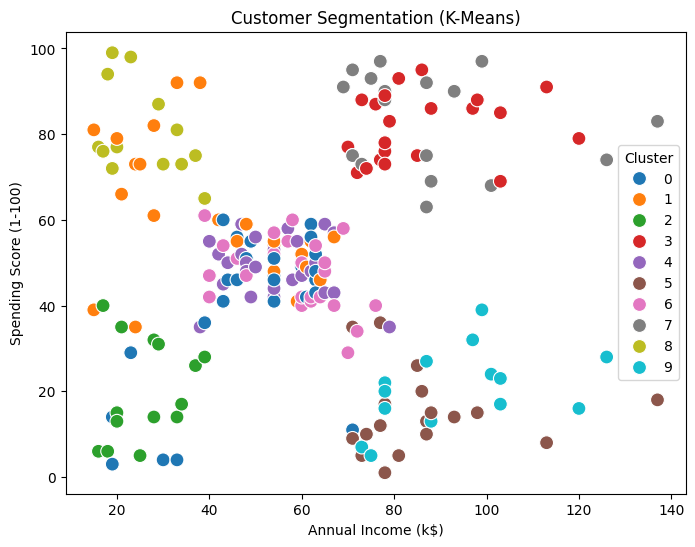


Cluster Profiles:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.000000,58.846154,48.692308,39.846154
1,0.000000,25.250000,41.250000,60.916667
2,0.928571,41.214286,26.071429,20.142857
3,1.000000,32.190476,86.047619,81.666667
4,1.000000,54.153846,54.230769,48.961538
5,0.000000,38.473684,85.894737,14.210526
6,1.000000,27.960000,57.360000,47.120000
7,0.000000,33.277778,87.111111,82.666667
8,1.000000,25.461538,25.692308,80.538462


In [ ]:
# ============================================================
# GOOGLE COLAB: CUSTOMER SEGMENTATION (K-MEANS)
# Dataset: Mall_customer.csv
# ============================================================

from google.colab import files
uploaded = files.upload()   # Upload Mall_customer.csv


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv("Mall_Customers.csv")
df.head()


df = df.drop(columns=["CustomerID"])

# Encode Gender
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

sil_scores = {}

for k in range(2, 11):
    model = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=20,
        random_state=42
    )
    labels = model.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

# Best K
best_k = max(sil_scores, key=sil_scores.get)
print("Optimal K:", best_k)
print("Silhouette Score:", round(sil_scores[best_k], 4))

kmeans = KMeans(
    n_clusters=best_k,
    init="k-means++",
    n_init=50,
    random_state=42
)

df["Cluster"] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["Cluster"],
    palette="tab10",
    s=100
)
plt.title("Customer Segmentation (K-Means)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

print("\nCluster Profiles:")
df.groupby("Cluster").mean(numeric_only=True)
